# Week2 : Data Collection and Preprocessing

# 1. Load and Explore the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('singapore_airlines_reviews.csv', encoding='utf-8')

# Display the first 5 rows to understand the structure
df.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [3]:
# Get the shape of the dataset (number of rows and columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Get information about data types and missing values
df.info()

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Summary statistics of numerical columns (if any)
df.describe()


Dataset contains 10000 rows and 7 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB
Missing values per column:
published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 1
helpful_votes         0
dtype: int64


,rating,helpful_votes
count,10000.000000,10000.000000
mean,4.015800,1.275200
std,1.346006,2.721618
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,5.000000,2.000000
max,5.000000,158.000000


# 2. Data Cleaning

In [4]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if found
df.drop_duplicates(inplace=True)
print(f"Dataset after removing duplicates: {df.shape[0]} rows")


Number of duplicate rows: 0
Dataset after removing duplicates: 10000 rows


In [5]:
# Display column names
print("Column names:")
print(df.columns)

# Check for unique values in each column (useful if there are categorical columns)
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")


Column names:
Index(['published_date', 'published_platform', 'rating', 'type', 'text',
       'title', 'helpful_votes'],
      dtype='object')
Unique values in published_date: 9997
Unique values in published_platform: 2
Unique values in rating: 5
Unique values in type: 1
Unique values in text: 10000
Unique values in title: 8476
Unique values in helpful_votes: 27


# 3. Text Preprocessing with NLTK

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK datasets (run only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natamontosawat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natamontosawat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natamontosawat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/natamontosawat/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Load English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize the words
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text


In [9]:
# Apply the cleaning function to the 'review_text' column
df['cleaned_review'] = df['text'].apply(lambda x: clean_text(str(x)))

# Display the cleaned data
df[['text', 'cleaned_review']].head()

,text,cleaned_review
0,We used this airline to go from Singapore to L...,used airline go singapore london heathrow issu...
1,The service on Singapore Airlines Suites Class...,service singapore airline suite class nothing ...
2,"Booked, paid and received email confirmation f...",booked paid received email confirmation extra ...
3,"Best airline in the world, seats, food, servic...",best airline world seat food service brilliant...
4,Premium Economy Seating on Singapore Airlines ...,premium economy seating singapore airline narr...


In [10]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_singapore_airlines_reviews.csv', index=False, encoding='utf-8')
print("Cleaned dataset saved as 'cleaned_singapore_airlines_reviews.csv'.")


Cleaned dataset saved as 'cleaned_singapore_airlines_reviews.csv'.


# 4. Exploratory Data Analysis (EDA)

In [11]:
pip install matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
from wordcloud import WordCloud

In [13]:
# Load the preprocessed dataset
df = pd.read_csv('cleaned_singapore_airlines_reviews.csv')

# Display the first few rows to confirm the data is loaded correctly
df.head()


,published_date,published_platform,rating,type,text,title,helpful_votes,cleaned_review
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,used airline go singapore london heathrow issu...
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,service singapore airline suite class nothing ...
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,booked paid received email confirmation extra ...
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,best airline world seat food service brilliant...
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,premium economy seating singapore airline narr...


In [14]:
# Display dataset information
df.info()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
 7   cleaned_review      10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB
Missing values per column:
published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 1
helpful_votes         0
cleaned_review        0
dtype: int64


## Analyze the Distribution of Ratings

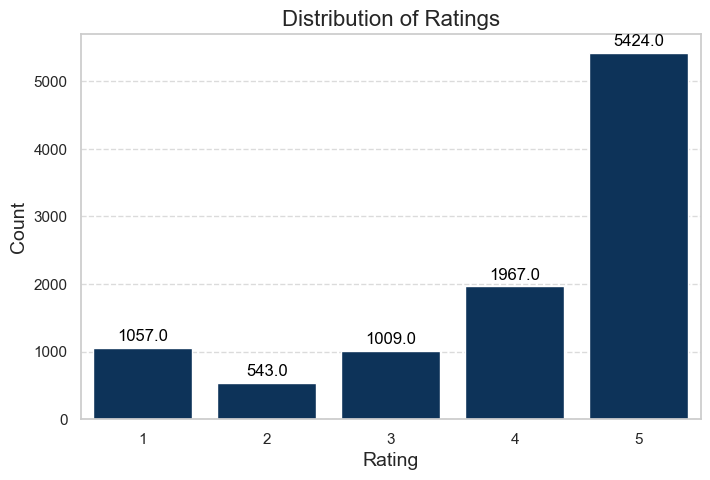

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='rating', data=df, palette=['#003366'])  # Dark blue color

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the title and labels
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Analyze Review Lengths

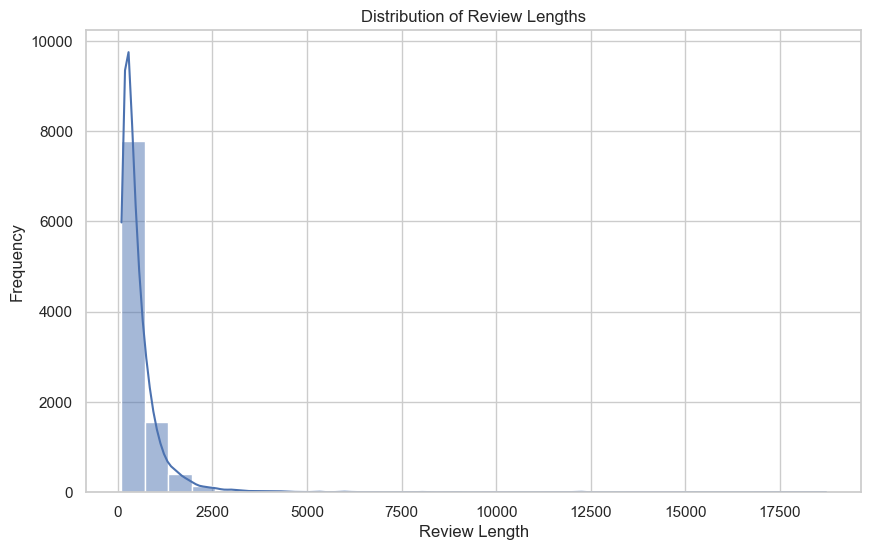

In [16]:
# Add a column for the length of each review
df['review_length'] = df['text'].apply(lambda x: len(str(x)))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

## Generate Word Clouds for Frequent Words

In [17]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df['cleaned_review'].dropna())

# Tokenize the text to get individual words
words = all_reviews.split()

# Get the frequency of each word using Counter
word_freq = Counter(words)

# Get the top 100 most common words
top_100_words = word_freq.most_common(100)

# Print the top 100 words with their frequencies
print("Top 100 words and their frequencies:")
for word, freq in top_100_words:
    print(f"{word}: {freq}")

# Generate a word cloud using the top 100 words
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate_from_frequencies(dict(top_100_words))



Top 100 words and their frequencies:
flight: 14352
singapore: 11671
airline: 11456
service: 7210
seat: 6726
food: 5613
good: 5242
time: 4528
economy: 3582
class: 3474
staff: 3301
crew: 3052
meal: 3002
great: 2922
one: 2917
would: 2730
hour: 2685
business: 2483
comfortable: 2269
u: 2258
cabin: 2197
experience: 2195
fly: 2145
get: 2084
plane: 2075
always: 2072
sq: 2067
entertainment: 2006
first: 1981
excellent: 1877
even: 1873
leg: 1851
back: 1829
best: 1807
passenger: 1796
also: 1762
long: 1681
could: 1598
like: 1584
well: 1580
flying: 1520
premium: 1513
much: 1510
airport: 1494
air: 1487
friendly: 1483
trip: 1454
better: 1399
really: 1396
drink: 1386
way: 1353
new: 1254
travel: 1230
customer: 1195
choice: 1166
year: 1145
flew: 1136
check: 1113
make: 1091
room: 1090
day: 1085
return: 1085
served: 1053
never: 1031
aircraft: 1022
made: 1008
still: 1005
lounge: 989
extra: 982
attendant: 981
inflight: 967
got: 958
boarding: 946
helpful: 946
nice: 940
need: 930
movie: 919
go: 900
flown: 893


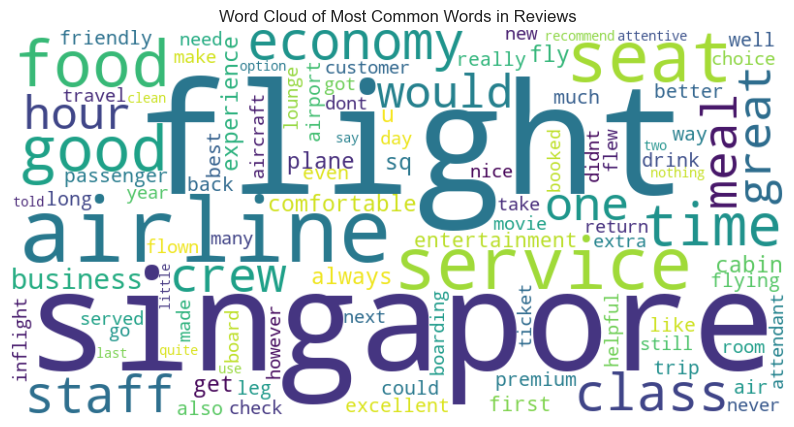

In [18]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Reviews')
plt.show()

## Analyze Trends Over Time 

In [19]:
# Load the dataset
df = pd.read_csv('cleaned_singapore_airlines_reviews.csv')

# Convert the 'published_date' column to datetime format
# Extract only the date portion (YYYY-MM-DD) and ignore the time and timezone
df['published_date'] = pd.to_datetime(df['published_date'].str.extract(r'(\d{4}-\d{2}-\d{2})')[0], errors='coerce')

# Check if the conversion was successful
print(df['published_date'].head())


0   2024-03-12
1   2024-03-11
2   2024-03-11
3   2024-03-11
4   2024-03-10
Name: published_date, dtype: datetime64[ns]


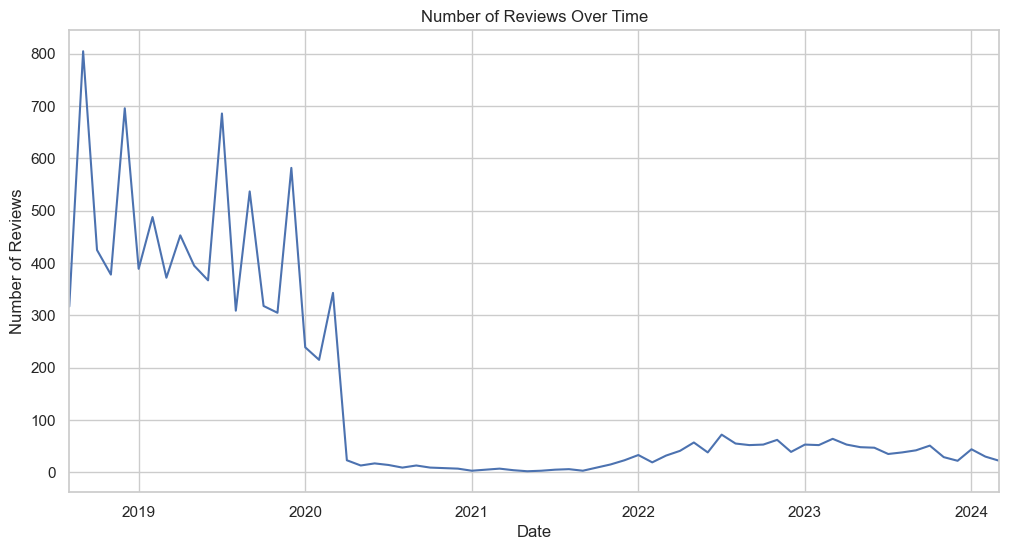

In [20]:
# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
df.set_index('published_date').resample('M')['rating'].count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()